In [ ]:
######### Preprocessing #########

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.simplefilter("ignore")

df = pd.read_csv('./dataset_malwares.csv')
print(df)

                                              Name  e_magic  e_cblp  e_cp  \
0      VirusShare_a878ba26000edaac5c98eff4432723b3    23117     144     3   
1      VirusShare_ef9130570fddc174b312b2047f5f4cf0    23117     144     3   
2      VirusShare_ef84cdeba22be72a69b198213dada81a    23117     144     3   
3      VirusShare_6bf3608e60ebc16cbcff6ed5467d469e    23117     144     3   
4      VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb    23117     144     3   
...                                            ...      ...     ...   ...   
19606                                     clip.exe    23117     144     3   
19607                 VNC-Server-6.2.0-Windows.exe    23117     144     3   
19608      Microsoft.GroupPolicy.Management.ni.dll    23117       0     0   
19609                            cryptuiwizard.dll    23117     144     3   
19610                                  winhttp.dll    23117     144     3   

       e_crlc  e_cparhdr  e_minalloc  e_maxalloc  e_ss  e_sp  ...  \
0     

In [2]:
#Obtaining dataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19611 entries, 0 to 19610
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          19611 non-null  object 
 1   e_magic                       19611 non-null  int64  
 2   e_cblp                        19611 non-null  int64  
 3   e_cp                          19611 non-null  int64  
 4   e_crlc                        19611 non-null  int64  
 5   e_cparhdr                     19611 non-null  int64  
 6   e_minalloc                    19611 non-null  int64  
 7   e_maxalloc                    19611 non-null  int64  
 8   e_ss                          19611 non-null  int64  
 9   e_sp                          19611 non-null  int64  
 10  e_csum                        19611 non-null  int64  
 11  e_ip                          19611 non-null  int64  
 12  e_cs                          19611 non-null  int64  
 13  e

In [3]:
#Separating input and output labels
X = df.drop(['Name','Malware'], axis=1)
y = df['Malware']

In [4]:
print(y)

0        1
1        1
2        1
3        1
4        1
        ..
19606    0
19607    0
19608    0
19609    0
19610    0
Name: Malware, Length: 19611, dtype: int64


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
#example training, validation and test data split
train, validate, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

In [7]:
#obtaining the utitlized training, validation, and test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [8]:
#viewing first 5 values of the training split
X_train.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
12108,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,1,1,0,0,606324,622592,0,0
17792,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,23,117,0,0,41520,49152,0,0
5510,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,9,195,0,139680,134260,352256,344064,0
12013,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,3,101,0,0,825236,831488,0,0
11999,23117,144,3,0,4,0,65535,0,184,0,...,3758096416,0,12,12,0,0,1138688,1142784,0,0


In [9]:
#normalization of the training, test and validation split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [70]:
######### Model building and hyperparameter optimization #########

In [71]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Define a grid of hyperparameter combinations to search over
param_grid = {
    'hidden_layer_sizes': [(4,), (8,), (16,), (4, 4), (8, 8), (16, 16), (4, 4, 4), (8, 8, 8), (16, 16, 16), (4, 4, 4, 4), (8, 8, 8, 8), (16, 16, 16, 16)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd']
}

In [72]:
# Define the neural network model
mlp_model = MLPClassifier(max_iter=1000, random_state=1)

In [73]:
# Create the GridSearchCV object
from sklearn.model_selection import PredefinedSplit
split_index = [-1]*len(X_train_scaled) + [0]*len(X_val_scaled)
X = np.concatenate((X_train_scaled, X_val_scaled), axis=0)
y = np.concatenate((y_train, y_val), axis=0)
pds = PredefinedSplit(test_fold = split_index)

grid_search = GridSearchCV(estimator = mlp_model,
                   cv=pds,
                   param_grid=param_grid, refit=False,scoring='f1', verbose=3)

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Fitting 1 folds for each of 48 candidates, totalling 48 fits
[CV 1/1] END activation=relu, hidden_layer_sizes=(4,), solver=adam;, score=0.976 total time=   4.7s
[CV 1/1] END activation=relu, hidden_layer_sizes=(4,), solver=sgd;, score=0.973 total time=   6.6s
[CV 1/1] END activation=relu, hidden_layer_sizes=(8,), solver=adam;, score=0.977 total time=   5.7s
[CV 1/1] END activation=relu, hidden_layer_sizes=(8,), solver=sgd;, score=0.974 total time=   7.0s
[CV 1/1] END activation=relu, hidden_layer_sizes=(16,), solver=adam;, score=0.983 total time=   9.7s
[CV 1/1] END activation=relu, hidden_layer_sizes=(16,), solver=sgd;, score=0.974 total time=   8.4s
[CV 1/1] END activation=relu, hidden_layer_sizes=(4, 4), solver=adam;, score=0.975 total time=   4.2s
[CV 1/1] END activation=relu, hidden_layer_sizes=(4, 4), solver=sgd;, score=0.974 total time=   8.2s
[CV 1/1] END activation=relu, hidden_layer_sizes=(8, 8), solver=adam;, score=0.981 total time=   8.1s
[CV 1/1] END activation=relu, hidde

In [74]:
best_params = {'activation': 'relu', 'hidden_layer_sizes': (16, 16, 16, 16), 'solver': 'adam'}

In [75]:
# Create the MLP model with the best hyperparameters
best_mlp_model = MLPClassifier(max_iter=1000, random_state=1, **best_params)
# Train the model on the scaled training data
best_mlp_model.fit(X_train_scaled, y_train)

# Predict on the validation set
y_val_pred_best = best_mlp_model.predict(X_val_scaled)

# Evaluate the performance
accuracy_best = accuracy_score(y_val, y_val_pred_best)
print(f"Accuracy (Optimized MLP Model): {accuracy_best}")
print("Classification Report:")
print(classification_report(y_val, y_val_pred_best))

Accuracy (Optimized MLP Model): 0.9785823559408465
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1040
           1       0.98      0.99      0.99      2882

    accuracy                           0.98      3922
   macro avg       0.98      0.97      0.97      3922
weighted avg       0.98      0.98      0.98      3922



In [11]:
######### Evaluation #########

In [77]:
# Combine training and validation data
X = np.concatenate((X_train_scaled, X_val_scaled), axis=0)
y = np.concatenate((y_train, y_val), axis=0)

We have used the validation split to select the best hyperparameters, now we can incorporate the data into training the best configuration.

In [78]:
# Create the MLP model with the best hyperparameters
best_mlp_model = MLPClassifier(max_iter=1000, random_state=1, **best_params)
# Train the model on the scaled training data
best_mlp_model.fit(X,y)

# Predict probabilities on the test set
y_probs = best_mlp_model.predict_proba(X_test_scaled)

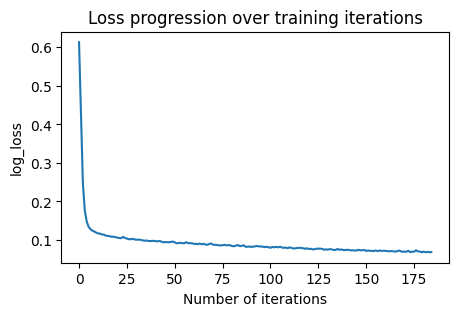

In [79]:
from matplotlib import pyplot as plt

# Plot training loss over iterations
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(best_mlp_model.loss_curve_)
ax.set_xlabel('Number of iterations')
ax.set_ylabel(f'{best_mlp_model.loss}')
ax.set_title('Loss progression over training iterations')
plt.show()

The loss progression graph illustrates the training process of our neural network, which was initially set to run for 1000 iterations. However, the model demonstrated rapid learning, with the logarithm of the loss decreasing sharply within the first 25 iterations and plateauing around iteration 50. This fast convergence indicates that the model was able to find a good set of weights early in the training process, effectively minimizing the cross-entropy loss. Consequently, even though we prepared for a lengthy training process, the early stopping mechanism inherent to scikit-learn's MLPClassifier likely would have terminated training much earlier, conserving computational resources and preventing the risk of overfitting. This efficient training behavior showcases the algorithm's capability to achieve convergence swiftly, which is desirable in practice

In [10]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    # construct a confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['not malware', 'malware'], yticklabels=['not malware', 'malware'], vmin=0, vmax=np.count_nonzero(y_true == 0), annot_kws={'size': 15})

    ax.set_yticklabels(labels=ax.get_yticklabels(), va='center')
    plt.tick_params(axis='both', which='major', labelsize=13)
    plt.xlabel('Predicted labels', fontsize = 14, labelpad=12)
    plt.ylabel('True labels', fontsize = 14, labelpad=12)
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=12)

    plt.show()

    return cm

In [96]:
y_pred = [np.argmax(prob_distribution) for prob_distribution in y_probs]

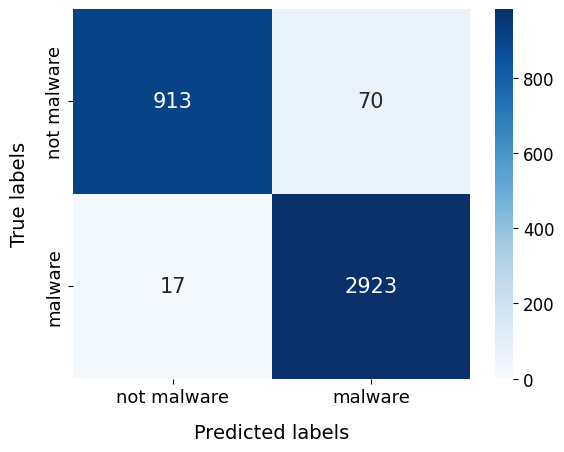

In [97]:
tn, fp, fn, tp = plot_confusion_matrix(y_test, y_pred).ravel()

The confusion matrix indicates a high level of performance by our classification model. With 2923 true positives and only 17 false negatives, our model is highly sensitive, successfully capturing 99.42% of malware instances. This is critical in a security context where failing to detect malware could have severe implications. Its ability to identify non-malware is also strong, indicated by the 913 true negatives out of the non-malware instances. Although there are 70 false positives, this number is relatively small compared to the true negatives, suggesting that the model is quite precise in distinguishing non-malicious instances. Overall, these results suggest that the model is very effective at detecting malware with a low rate of false negatives, which is essential for robust cybersecurity measures.

In [98]:
# Accuracy
(tp+tn)/(tp+fp+fn+tn)

0.9778230945704818

Our neural network model achieved an accuracy of 97.78% in classifying data as malware or non-malware. This high level of accuracy is encouraging and suggests that the model is highly effective in general classification tasks within our dataset. However, due to the imbalanced nature of our dataset, with a greater prevalence of malware instances, this accuracy figure should be interpreted with caution. It is essential to further evaluate the model using additional performance metrics like sensitivity, specificity, and the F1 score to gain a more nuanced understanding of its ability to correctly identify both malware and non-malware instances, especially given the lower representation of non-malware in the dataset

In [99]:
# Sensitivity (TPR)
tp/(tp+fn)

0.9942176870748299

Our model demonstrates a remarkable sensitivity of 99.42% in identifying malware within our dataset, where malware constitutes majority of the data. This high sensitivity rate is critical for our cybersecurity efforts, indicating that the model can reliably detect the vast majority of malware instances, with only a very small fraction potentially slipping through. Given the imbalanced nature of our dataset, this level of sensitivity ensures that our model is particularly adept at recognizing and flagging malware, which is our primary concern. Nonetheless, while this high sensitivity is advantageous for minimizing missed malware detections, it is also essential to assess other metrics such as specificity and the F1 score to ensure that the model maintains a balanced performance, especially in correctly identifying the less prevalent non-malware instances.

In [100]:
# Specificity (TNR)
tn/(tn+fp)

0.9287894201424212

Our model has achieved a specificity of 92.88% in correctly identifying non-malware instances within our dataset. This high specificity is a strong indicator of the model's ability to distinguish between malicious and non-malicious software, particularly important in our dataset where non-malware represents a smaller portion (approximately 25%). The 92.88% specificity shows that the model effectively minimizes false positives, thereby reducing the risk of mistakenly classifying benign software as malware. This is vital for maintaining system usability and avoiding unnecessary disruption. While the high specificity is commendable, it's equally important to balance it with sensitivity, which we have also found to be high. Together, these metrics suggest a well-rounded performance of our model in detecting malware, while reliably recognizing and preserving legitimate software operations

In [101]:
# F1 score
2*tp/(2*tp+fn+fp)

0.9853362548457778

Our model exhibits an outstanding F1 score of 98.53%, reflecting a highly effective balance between precision and sensitivity in the context of our imbalanced dataset, which is predominantly comprised of malware instances. This high F1 score underscores the model's capability to accurately detect malware (as evidenced by its high sensitivity) while maintaining a high precision rate, meaning it correctly identifies a large majority of malware instances without wrongly classifying non-malicious software as malware. This balance is crucial for the practical effectiveness of our cybersecurity solution, ensuring robust malware detection capabilities while minimizing false alarms and maintaining user trust. The exceptional F1 score, in tandem with our model's high accuracy, sensitivity, and specificity, collectively demonstrates its overall efficacy and reliability in malware classification tasks within our specific dataset composition.

In [102]:
def plot_roc(y_true, y_pred_prob, y_pred):
    # calculate ROC rurve and its AUC metric
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    auc = roc_auc_score(y_true, y_pred_prob)

    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2, color='darkblue')
    plt.plot(fpr, tpr, label='ROC (AUC = {:.3f})'.format(auc), linewidth=2, color='darkorange')

    plt.tick_params(axis='both', which='major', labelsize=13)
    plt.xlabel('False positive rate', fontsize=14, labelpad=12)
    plt.ylabel('True positive rate', fontsize=14, labelpad=8)
    plt.title('Receiver Operating Characteristic Curve', fontsize=15)
    plt.legend(loc='lower right', fontsize=15)
    plt.xlim(-0.01,1)
    plt.ylim(0,1.01)

    plt.show()

    return fpr, tpr, thresholds

In [103]:
y_malware_probs = [prob_distribution[1] for prob_distribution in y_probs]

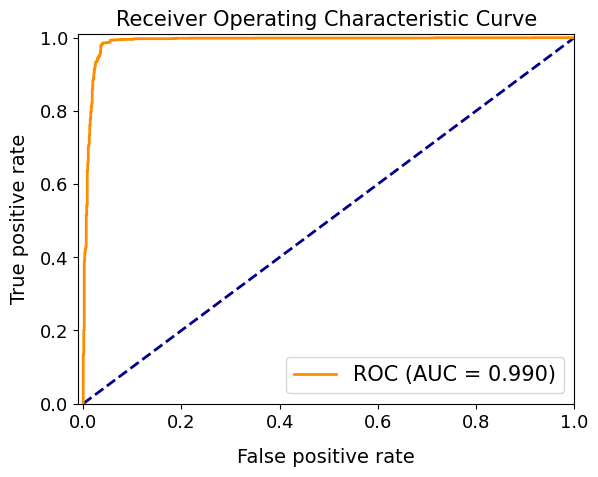

In [104]:
fpr, tpr, thresholds = plot_roc(y_test, y_malware_probs, y_pred)

In [93]:
print(f'Optimal threhold which maximizes TPR and minimizes FPR is: {thresholds[np.argmax(tpr - fpr)]:.2f}')

Optimal threhold which maximizes TPR and minimizes FPR is: 0.87



The ROC curve represents the performance of a classification model at various threshold settings. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR). TPR, also known as recall, measures the proportion of actual positives correctly identified and we aim to maximize this. FPR indicates how many incorrect positive predictions were made out of all negative cases, and we aim to minimize this.

AUC, or Area Under the Curve, evaluates the model's ability to differentiate between classes. An AUC of 0.990 is outstanding, suggesting the model has a 99% chance of correctly distinguishing between classes.The threshold is the probability above which a prediction is labeled positive. Currently set at that adjusting this threshold to  87% would optmize the balance between TPR and FPR for our specific needs, meaning the model will only label a prediction as malware if it's at least 87% certain. This would help in scenarios where false positives are particularly costly or disruptive.ive.

The interpretability of a model is an important consideration, particularly in domains where understanding the decision-making process is as crucial as the decision itself. The use of an MLP (Multi-Layer Perceptron) classifier, a type of neural network, presents challenges in terms of interpretability. Due to the complex, layered structure of neural networks and the often non-linear transformations they apply, MLPs are commonly referred to as "black boxes." This means that while they can model complex relationships and achieve high accuracy, it is not straightforward to decipher the specific reasons behind any given prediction.